<a href="https://www.kaggle.com/code/sahrul59/analyzing-app-in-usa?scriptVersionId=119980134" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 align="center">Analyzing App in USA </h1>

<h3 align="right">By - <a href="https://www.linkedin.com/in/sahrul59/">Muhamad Sahrul</a></h3>

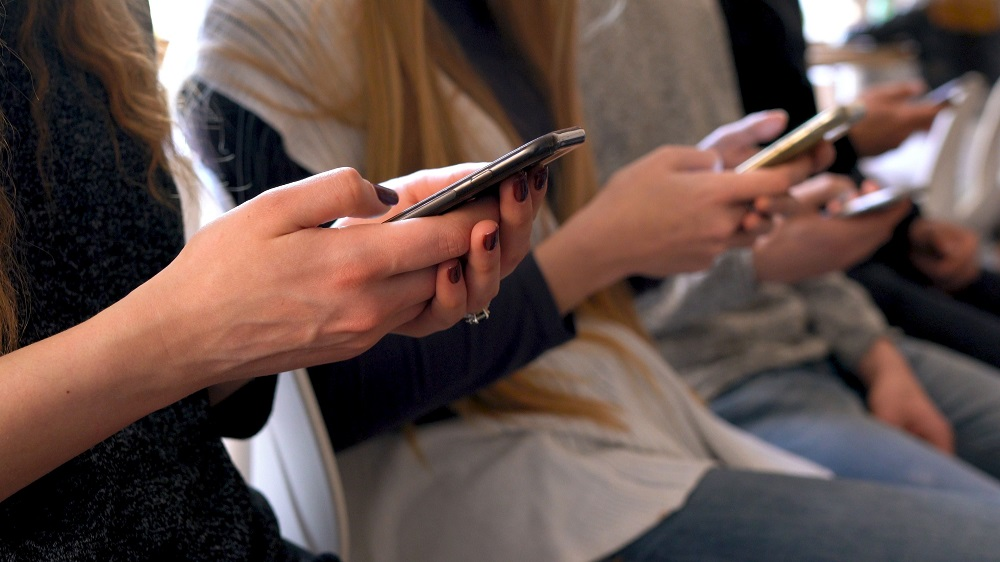

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/images/phone.jpg
/kaggle/input/analyzing-app-interest-in-usa/app interest.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
delim_whitespace=True
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('../input/analyzing-app-interest-in-usa/app interest.csv')

In [4]:
df.head()

,id,datetime,name,email,gender,city,state,login_hour,phone,digital_interest,cell_phone_brand,total_usage,notifications,unlocks,times_opened
0,1,5/31/2022,Lauritz Gosswell,lgosswell0@nih.gov,Male,Allentown/Bethlehem/Easton,PA,12:26:00 AM,4391083956,e-commerce,iphone,38,600.0,102.0,49
1,2,3/27/2022,Nat Attenbarrow,nattenbarrow1@nih.gov,Male,Albany,GA,5:09:00 PM,7482803338,e-commerce,iphone,39,411.0,96.0,48
2,3,7/1/2022,Gerda McGeoch,gmcgeoch2@army.mil,Female,Nantucket,MA,12:14:00 AM,3458642282,e-commerce,iphone,64,709.0,114.0,55
3,4,7/2/2022,Regan Drust,rdrust3@miitbeian.gov.cn,Male,Alexandria,LA,12:52:00 AM,2532303963,e-commerce,iphone,14,542.0,119.0,23
4,5,4/6/2022,Nev Pettko,npettko4@quantcast.com,Male,Augusta,GA,11:35:00 PM,3964299544,e-commerce,iphone,3,583.0,85.0,5


# <span style='color:aliceblue'><center style='background:maroon;border-radius:0px 25px;padding:25px'> Overall Usage </center></span>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1000 non-null   int64  
 1   datetime          1000 non-null   object 
 2   name              1000 non-null   object 
 3   email             1000 non-null   object 
 4   gender            1000 non-null   object 
 5   city              999 non-null    object 
 6   state             999 non-null    object 
 7   login_hour        1000 non-null   object 
 8   phone             1000 non-null   int64  
 9   digital_interest  1000 non-null   object 
 10  cell_phone_brand  1000 non-null   object 
 11  total_usage       1000 non-null   int64  
 12  notifications     999 non-null    float64
 13  unlocks           999 non-null    float64
 14  times_opened      1000 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 117.3+ KB


In [6]:
df.isnull().sum()

id                  0
datetime            0
name                0
email               0
gender              0
city                1
state               1
login_hour          0
phone               0
digital_interest    0
cell_phone_brand    0
total_usage         0
notifications       1
unlocks             1
times_opened        0
dtype: int64

In [7]:
df.columns

Index(['id', 'datetime', 'name', 'email', 'gender', 'city', 'state',
       'login_hour', 'phone', 'digital_interest', 'cell_phone_brand',
       'total_usage', 'notifications', 'unlocks', 'times_opened'],
      dtype='object')

In [8]:
df.columns = ['id','datetime', 'name', 'email', 'gender', 'city', 'state', 'login_hour', 'phone', 'digital_interest', 'cell_phone_brand', 'total_usage', 'notifications', 'unlocks', 'times_opened']

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [10]:
df.corr()  

,id,phone,total_usage,notifications,unlocks,times_opened
id,1.000000,-0.033435,0.001769,-0.009640,0.035998,0.001323
phone,-0.033435,1.000000,0.050653,0.009957,0.016063,0.053411
total_usage,0.001769,0.050653,1.000000,0.327284,0.168687,0.818482
notifications,-0.009640,0.009957,0.327284,1.000000,0.587059,0.362070
unlocks,0.035998,0.016063,0.168687,0.587059,1.000000,0.260645
times_opened,0.001323,0.053411,0.818482,0.362070,0.260645,1.000000


<AxesSubplot:>

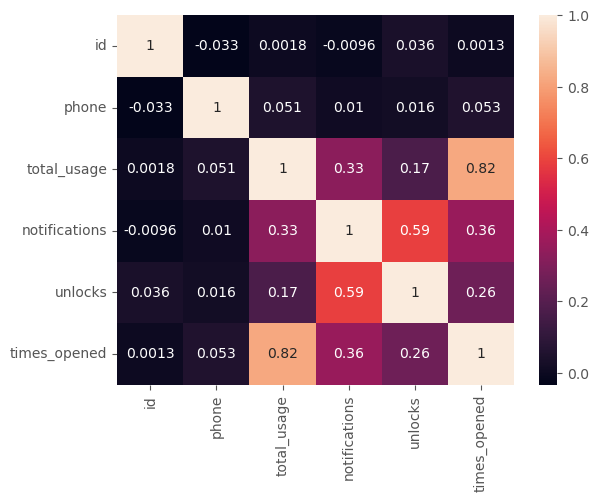

In [11]:
sns.heatmap(df.corr(),annot=True)


In [12]:
df.describe()


,id,phone,total_usage,notifications,unlocks,times_opened
count,1000.000000,1.000000e+03,1000.000000,999.000000,999.000000,1000.000000
mean,500.500000,5.576220e+09,64.139000,540.930931,113.384384,60.748000
std,288.819436,2.611756e+09,57.467105,142.045465,24.048265,43.362181
min,1.000000,1.005029e+09,1.000000,207.000000,70.000000,2.000000
25%,250.750000,3.354922e+09,17.000000,468.000000,96.000000,23.000000
50%,500.500000,5.582016e+09,58.000000,542.000000,110.000000,58.000000
75%,750.250000,7.881585e+09,91.000000,600.000000,136.000000,91.000000
max,1000.000000,9.994464e+09,244.000000,850.000000,163.000000,192.000000


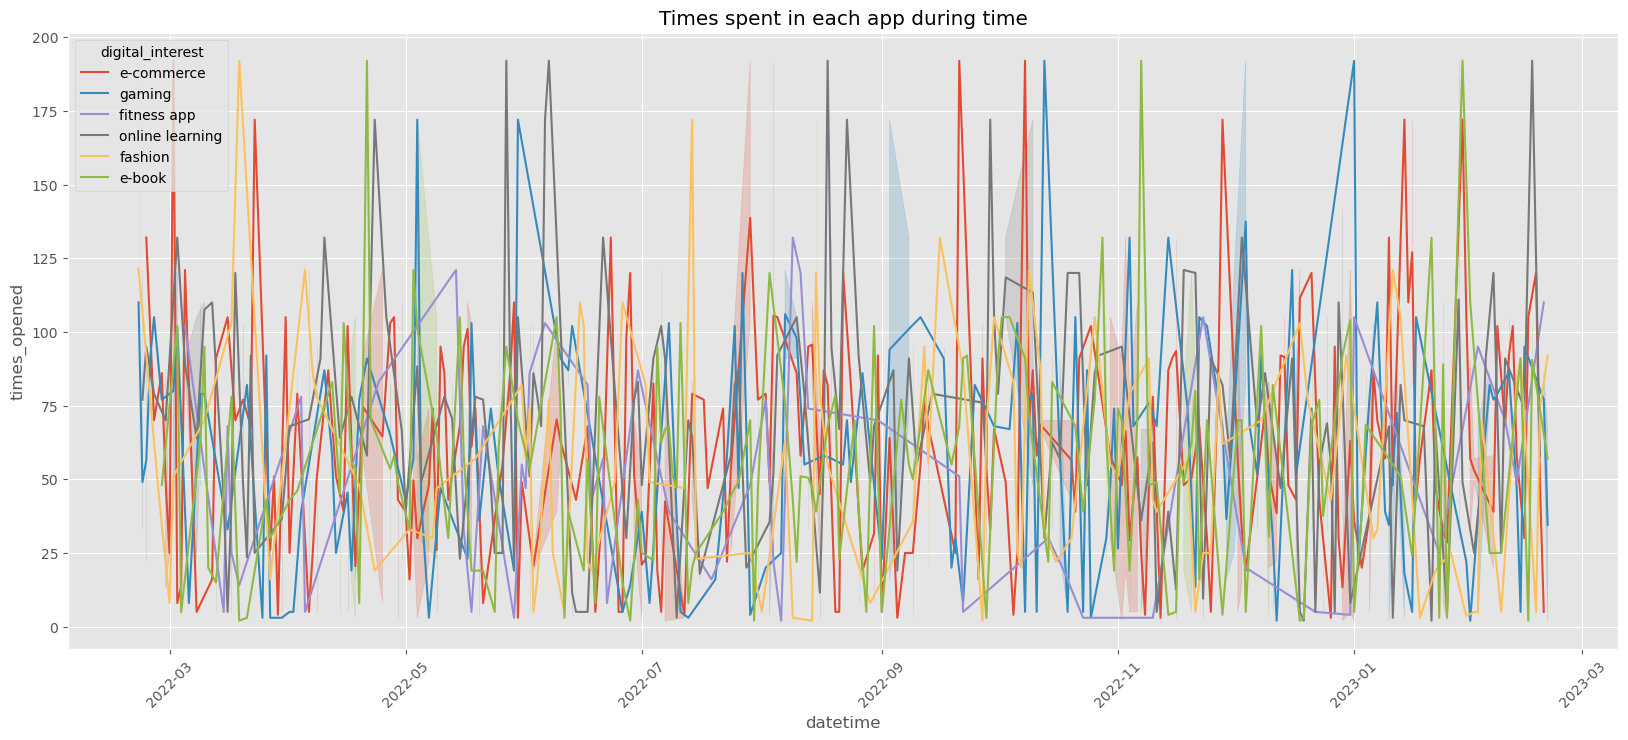

In [13]:
plt.figure(figsize=(20,8))
sns.lineplot(x=df['datetime'],y=df['times_opened'],hue=df['digital_interest'])
plt.title('Times spent in each app during time')
plt.xticks(rotation=45)
plt.show()

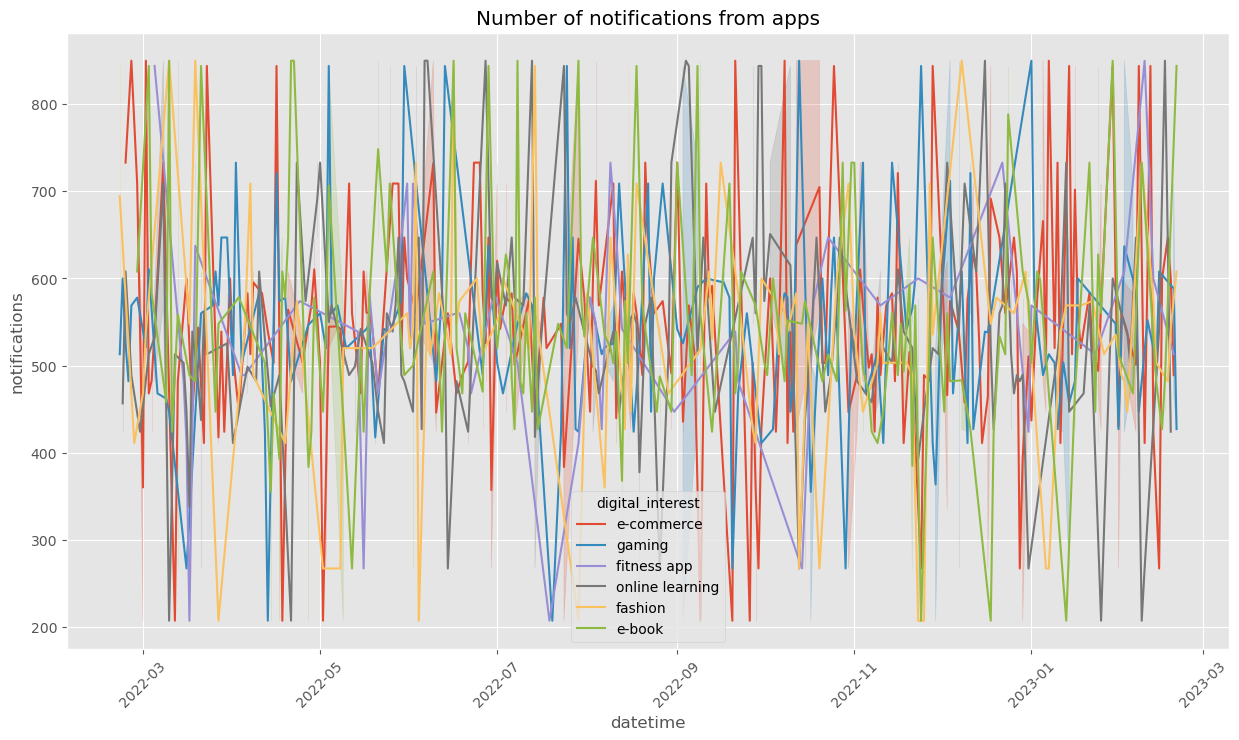

In [14]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df.datetime,y=df.notifications,hue=df.digital_interest)
plt.title('Number of notifications from apps')
plt.xticks(rotation=45)
plt.show()

In [15]:
notification =df.groupby('digital_interest').agg({'total_usage':'mean','notifications':'mean','times_opened':'mean'})

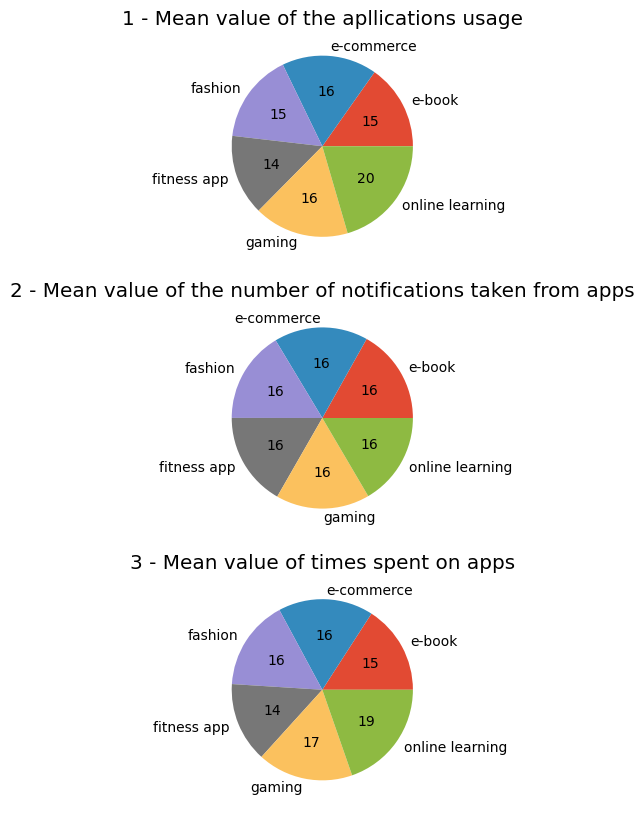

In [16]:
plt.figure (figsize=(10,10))
plt.subplot(311)
plt.title('1 - Mean value of the apllications usage')
plt.pie(x=notification.total_usage,labels=notification.index,autopct='%d')
plt.subplot(312)
plt.title('2 - Mean value of the number of notifications taken from apps')
plt.pie(x=notification.notifications ,labels=notification.index,autopct='%d')
plt.subplot(313)
plt.title('3 - Mean value of times spent on apps')
plt.pie(x=notification['times_opened'],labels=notification.index,autopct='%d')
plt.show()

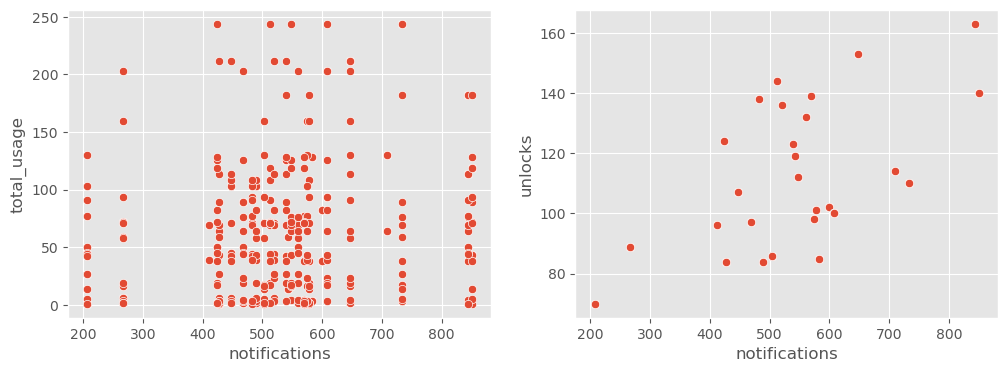

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.scatterplot(ax=ax[0], data=df, x='notifications', y='total_usage')
sns.scatterplot(ax=ax[1], data=df, x='notifications', y='unlocks')

plt.show()



# <span style='color:aliceblue'><center style='background:maroon;border-radius:0px 25px;padding:25px'> App details </center></span>

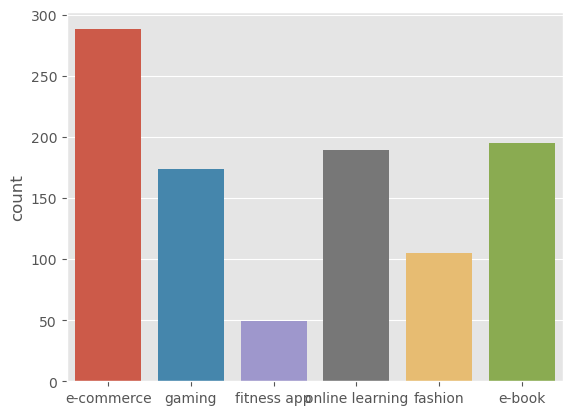

In [18]:
sns.countplot(data=df, x='digital_interest')
plt.xlabel(None)
plt.show()

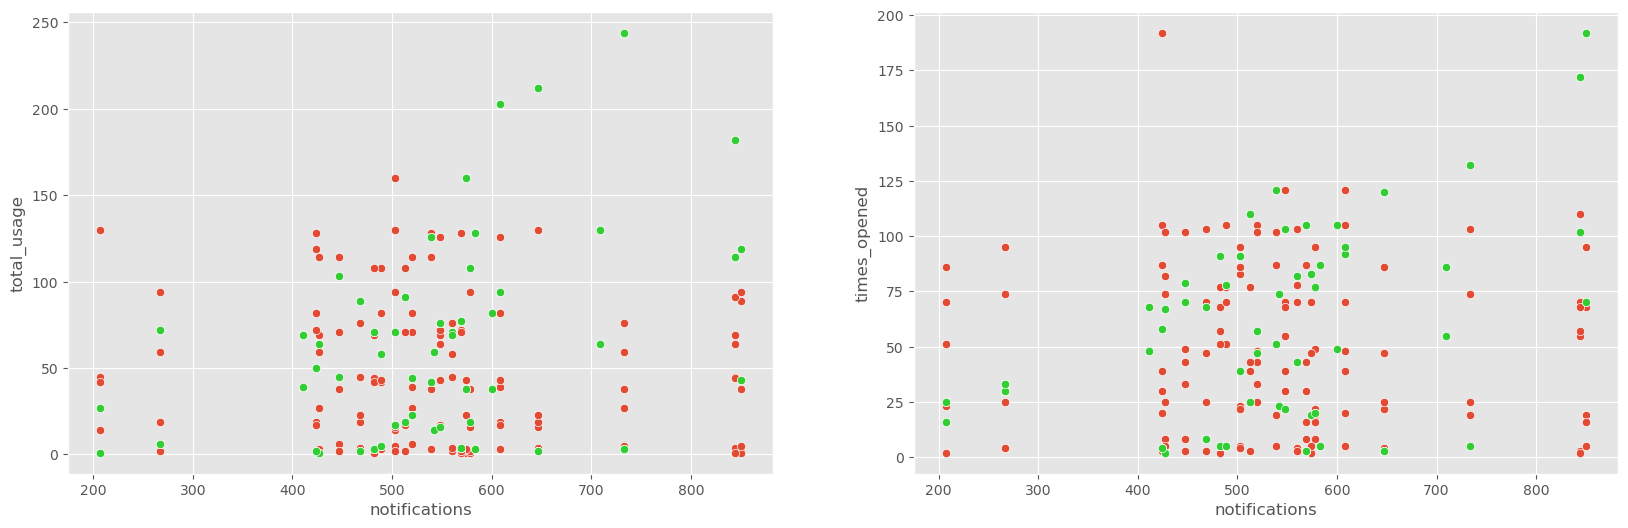

In [19]:
fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.scatterplot(ax=ax[0], data=df[df.digital_interest == 'e-book'], x='notifications', y='total_usage')
sns.scatterplot(ax=ax[1], data=df[df.digital_interest == 'e-book'], x='notifications', y='times_opened')

sns.scatterplot(ax=ax[0], data=df[df.digital_interest == 'gaming'], x='notifications', y='total_usage', color='limegreen')
sns.scatterplot(ax=ax[1], data=df[df.digital_interest == 'gaming'], x='notifications', y='times_opened', color='limegreen')

plt.show()

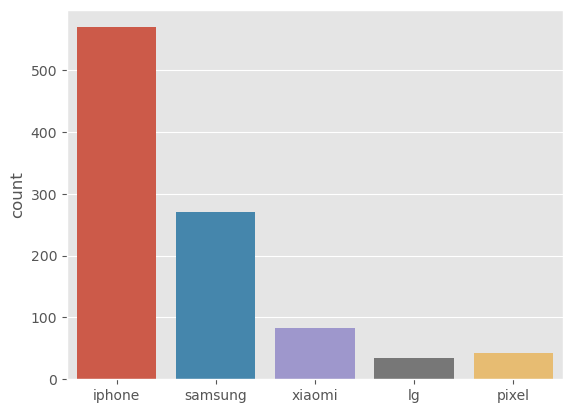

In [20]:
sns.countplot(data=df, x='cell_phone_brand')
plt.xlabel(None)
plt.show()